In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
data = np.load('/content/drive/MyDrive/Colab Notebooks/EEG/participant_1.npy')

In [ ]:
data.shape

(40, 489, 32, 32, 5)

In [ ]:
dataT = data.transpose(0, 1, 4, 2, 3)

In [ ]:
dataT.shape

(40, 489, 5, 32, 32)

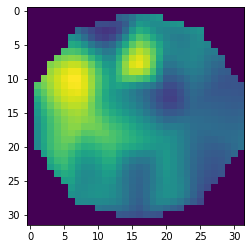

In [ ]:
plt.imshow(dataT[0][0][0])

In [ ]:
dataTR = dataT.reshape(-1, 5, 32, 32)

In [ ]:
dataTR.shape

(19560, 5, 32, 32)

In [ ]:
dataTR.max()

922.4226132720968

In [ ]:
dataTR = dataTR / dataTR.max()

In [ ]:
dataTR.max()

1.0

In [ ]:
dataTRTrain = dataTR[:18000]

In [ ]:
dataTRTrain.shape

(18000, 5, 32, 32)

In [ ]:
dataTRValid = dataTR[18000:19500]

In [ ]:
dataTRValid.shape

(1500, 5, 32, 32)

In [ ]:
dataTRTest = dataTR[19500:]

In [ ]:
dataTRTest.shape

(60, 5, 32, 32)

In [ ]:
dataTRTrain[0].max()

0.189978454738781

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# encoder
autoencoder1 = tf.keras.models.Sequential()
autoencoder1.add(tf.keras.layers.Conv3D(filters=256, kernel_size=3, strides=(1,2,2), padding='same', input_shape=(5,32,32,1)))
#autoencoder.add(tf.keras.layers.Conv3D(filters=128, kernel_size=3, strides=2, padding='same'))
#autoencoder.add(tf.keras.layers.Conv3D(filters=128, kernel_size=3, strides=2, padding='same'))
#autoencoder.add(tf.keras.layers.Conv3D(filters=128, kernel_size=3, strides=2, padding='same'))


autoencoder1.add(tf.keras.layers.Conv3D(filters=128, kernel_size=3, strides=(1,1,1), padding='same'))

#decoder
#autoencoder.add(tf.keras.layers.Conv3DTranspose(filters=128, kernel_size=3, strides=2, padding='same'))
#autoencoder.add(tf.keras.layers.Conv3DTranspose(filters=128, kernel_size=3, strides=2, padding='same'))
#autoencoder.add(tf.keras.layers.Conv3DTranspose(filters=256, kernel_size=3, strides=2, padding='same'))
autoencoder1.add(tf.keras.layers.Conv3DTranspose(filters=1, kernel_size=3, strides=(1,2,2), activation='sigmoid', padding='same'))

In [ ]:
autoencoder1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 5, 16, 16, 256)    7168      
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 5, 16, 16, 128)    884864    
_________________________________________________________________
conv3d_transpose (Conv3DTran (None, 5, 32, 32, 1)      3457      
Total params: 895,489
Trainable params: 895,489
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder1.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
autoencoder1.fit(dataTRTrain.reshape(-1, 5, 32, 32, 1),
                dataTRTrain.reshape(-1, 5, 32, 32, 1),
                epochs = 30,
                batch_size = 200,
                callbacks = [callback])

Epoch 1/30
90/90 [==============================] - 33s 352ms/step - loss: 0.3603
Epoch 2/30
90/90 [==============================] - 31s 340ms/step - loss: 0.1966
Epoch 3/30
90/90 [==============================] - 31s 341ms/step - loss: 0.1915
Epoch 4/30
90/90 [==============================] - 31s 345ms/step - loss: 0.1905
Epoch 5/30
90/90 [==============================] - 31s 341ms/step - loss: 0.1895
Epoch 6/30
90/90 [==============================] - 31s 342ms/step - loss: 0.1892
Epoch 7/30
90/90 [==============================] - 31s 343ms/step - loss: 0.1888
Epoch 8/30
90/90 [==============================] - 31s 342ms/step - loss: 0.1885
Epoch 9/30
90/90 [==============================] - 31s 342ms/step - loss: 0.1886
Epoch 10/30
90/90 [==============================] - 31s 344ms/step - loss: 0.1879
Epoch 11/30
90/90 [==============================] - 31s 343ms/step - loss: 0.1878
Epoch 12/30
90/90 [==============================] - 31s 343ms/step - loss: 0.1880
Epoch 13/30
9

In [ ]:
evaluation = autoencoder1.evaluate(dataTRTest.reshape(-1, 5, 32, 32, 1), dataTRTest.reshape(-1, 5, 32, 32, 1))

2/2 [==============================] - 0s 171ms/step - loss: 0.1722


In [ ]:
predicted = autoencoder1.predict(dataTRTest.reshape(-1, 5, 32, 32, 1))

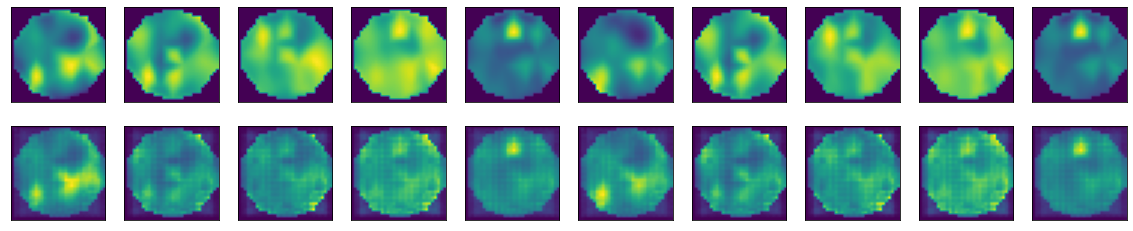

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([dataTRTest[:10].reshape(-1, 32, 32, 1), predicted[:10].reshape(-1, 32, 32, 1)], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Another Method

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

input_img = tf.keras.Input(shape=(5, 32, 32, 1))
l1 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu',  activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)

l3 = tf.keras.layers.MaxPooling3D(pool_size=(1,2,2), strides=(1,2,2), padding='same')(l2)
l3 = tf.keras.layers.Dropout(0.3)(l3)
l4 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)

l6 = tf.keras.layers.MaxPooling3D(pool_size=(1,2,2), strides=(1,2,2), padding='same')(l5)
l7 = tf.keras.layers.Conv3D(256, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)

In [ ]:
l8 = tf.keras.layers.UpSampling3D(size=(1,2,2))(l7)

l9 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)
l11 = tf.keras.layers.add([l5, l10])
l12 = tf.keras.layers.UpSampling3D(size=(1,2,2))(l11)
l13 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)
l15 = tf.keras.layers.add([l14, l2])
decoded = tf.keras.layers.Conv3D(1, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

autoencoder2 = tf.keras.Model(input_img, decoded)
#autoencoder_hfenn = tf.keras.Model(input_img, decoded)

In [ ]:
autoencoder2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 5, 32, 32, 1 0                                            
__________________________________________________________________________________________________
conv3d_2 (Conv3D)               (None, 5, 32, 32, 64 1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv3d_3 (Conv3D)               (None, 5, 32, 32, 64 110656      conv3d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling3d (MaxPooling3D)    (None, 5, 16, 16, 64 0           conv3d_3[0][0]                   
____________________________________________________________________________________________

In [ ]:
autoencoder2.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
autoencoder2.fit(dataTRTrain.reshape(-1, 5, 32, 32, 1),
                dataTRTrain.reshape(-1, 5, 32, 32, 1),                
                epochs = 30,
                batch_size = 200,
                validation_data = (dataTRValid.reshape(-1, 5, 32, 32, 1), dataTRValid.reshape(-1, 5, 32, 32, 1)),
                callbacks = [callback])

Epoch 1/30
90/90 [==============================] - 170s 2s/step - loss: 0.3706 - val_loss: 0.1778
Epoch 2/30
90/90 [==============================] - 162s 2s/step - loss: 0.1869 - val_loss: 0.1759
Epoch 3/30
90/90 [==============================] - 162s 2s/step - loss: 0.1846 - val_loss: 0.1751
Epoch 4/30
90/90 [==============================] - 163s 2s/step - loss: 0.1843 - val_loss: 0.1749
Epoch 5/30
90/90 [==============================] - 163s 2s/step - loss: 0.1838 - val_loss: 0.1748
Epoch 6/30
90/90 [==============================] - 163s 2s/step - loss: 0.1835 - val_loss: 0.1748
Epoch 7/30
90/90 [==============================] - 163s 2s/step - loss: 0.1836 - val_loss: 0.1748
Epoch 8/30
90/90 [==============================] - 163s 2s/step - loss: 0.1837 - val_loss: 0.1747
Epoch 9/30
90/90 [==============================] - 163s 2s/step - loss: 0.1837 - val_loss: 0.1747
Epoch 10/30
90/90 [==============================] - 163s 2s/step - loss: 0.1837 - val_loss: 0.1747
Epoch 11/

In [ ]:
evaluation2 = autoencoder2.evaluate(dataTRTest.reshape(-1, 5, 32, 32, 1), dataTRTest.reshape(-1, 5, 32, 32, 1))

2/2 [==============================] - 0s 122ms/step - loss: 0.1691


In [ ]:
predicted2 = autoencoder2.predict(dataTRTest.reshape(-1, 5, 32, 32, 1))

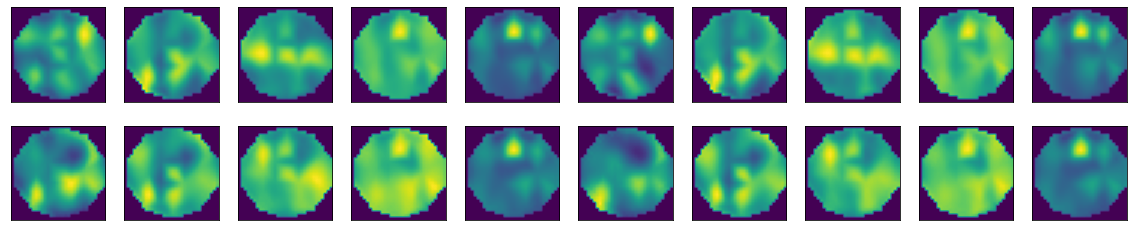

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([dataTRTest[10:20].reshape(-1, 32, 32, 1), predicted2[:10].reshape(-1, 32, 32, 1)], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Data dimension :(32,32,5)

In [ ]:
data.shape

(40, 489, 32, 32, 5)

In [ ]:
dataR = data.reshape(-1, 32, 32, 5)

In [ ]:
dataR.shape

(19560, 32, 32, 5)

In [ ]:
dataR.max()

922.4226132720968

In [ ]:
dataR = dataR / dataR.max()

In [ ]:
dataR.max()

1.0

In [ ]:
dataRTrain = dataR[:18000]

In [ ]:
dataRTrain.shape

(18000, 32, 32, 5)

In [ ]:
dataRTest = dataR[18000:]

In [ ]:
dataRTest.shape

(1560, 32, 32, 5)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

input_img = tf.keras.Input(shape=(32, 32, 5, 1))
l1 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu',  activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)

l3 = tf.keras.layers.MaxPooling3D(pool_size=(2,2,1), strides=(2,2,1), padding='same')(l2)
#l3 = tf.keras.layers.Dropout(0.3)(l3)
l4 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)

l6 = tf.keras.layers.MaxPooling3D(pool_size=(2,2,1), strides=(2,2,1), padding='same')(l5)
l7 = tf.keras.layers.Conv3D(256, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)
#encoder = tf.keras.Model(input_img, l7)


In [ ]:
l8 = tf.keras.layers.UpSampling3D(size=(2,2,1))(l7)

l9 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv3D(128, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)
l11 = tf.keras.layers.add([l5, l10])
l12 = tf.keras.layers.UpSampling3D(size=(2,2,1))(l11)
l13 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv3D(64, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)
l15 = tf.keras.layers.add([l14, l2])
decoded = tf.keras.layers.Conv3D(1, (3,3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

autoencoder3 = tf.keras.Model(input_img, decoded)
#autoencoder_hfenn = tf.keras.Model(input_img, decoded)

In [ ]:
autoencoder3.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 32, 32, 5, 1 0                                            
__________________________________________________________________________________________________
conv3d_12 (Conv3D)              (None, 32, 32, 5, 64 1792        input_7[0][0]                    
__________________________________________________________________________________________________
conv3d_13 (Conv3D)              (None, 32, 32, 5, 64 110656      conv3d_12[0][0]                  
__________________________________________________________________________________________________
max_pooling3d_2 (MaxPooling3D)  (None, 16, 16, 5, 64 0           conv3d_13[0][0]                  
____________________________________________________________________________________________

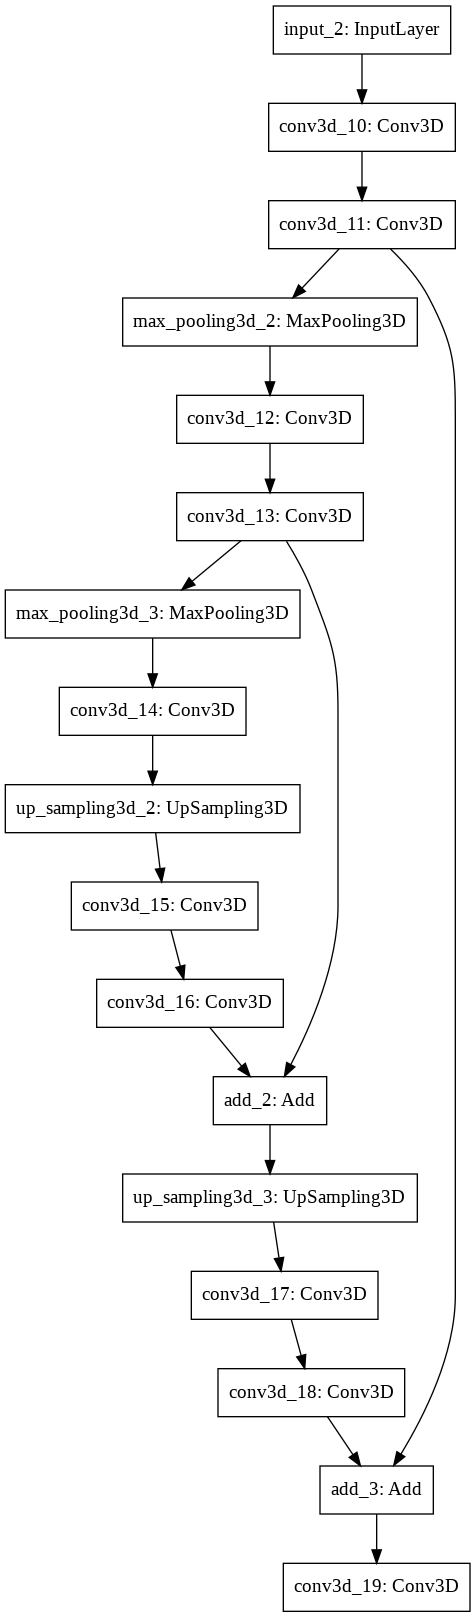

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=autoencoder, to_file='AE_model.png')

In [ ]:
autoencoder3.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
autoencoder3.fit(dataRTrain.reshape(-1, 32, 32, 5, 1),
                dataRTrain.reshape(-1, 32, 32, 5, 1),
                epochs = 30,
                batch_size = 200,
                validation_split = 0.1,
                callbacks = [callback])

Epoch 1/30
81/81 [==============================] - 165s 2s/step - loss: 0.6979 - val_loss: 0.1862
Epoch 2/30
81/81 [==============================] - 161s 2s/step - loss: 0.1874 - val_loss: 0.1838
Epoch 3/30
81/81 [==============================] - 161s 2s/step - loss: 0.1847 - val_loss: 0.1830
Epoch 4/30
81/81 [==============================] - 162s 2s/step - loss: 0.1839 - val_loss: 0.1828
Epoch 5/30
81/81 [==============================] - 162s 2s/step - loss: 0.1841 - val_loss: 0.1828
Epoch 6/30
81/81 [==============================] - 162s 2s/step - loss: 0.1837 - val_loss: 0.1827
Epoch 7/30
81/81 [==============================] - 162s 2s/step - loss: 0.1838 - val_loss: 0.1827
Epoch 8/30
81/81 [==============================] - 162s 2s/step - loss: 0.1839 - val_loss: 0.1827
Epoch 9/30
81/81 [==============================] - 162s 2s/step - loss: 0.1839 - val_loss: 0.1827
Epoch 10/30
81/81 [==============================] - 162s 2s/step - loss: 0.1839 - val_loss: 0.1827
Epoch 11/

In [ ]:
evaluation3 = autoencoder3.evaluate(dataRTest.reshape(-1, 32, 32, 5, 1), dataRTest.reshape(-1, 32, 32, 5, 1))

49/49 [==============================] - 6s 99ms/step - loss: 0.1745


In [ ]:
predicted3 = autoencoder3.predict(dataRTest.reshape(-1, 32, 32, 5, 1))

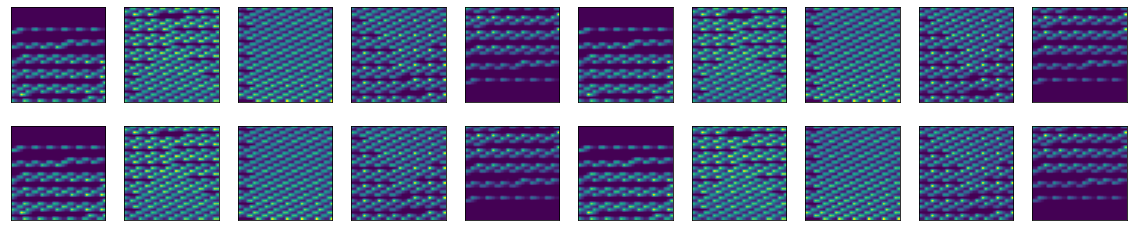

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([dataRTest[:10].reshape(-1, 32, 32, 1), predicted3[:10].reshape(-1, 32, 32, 1) ], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

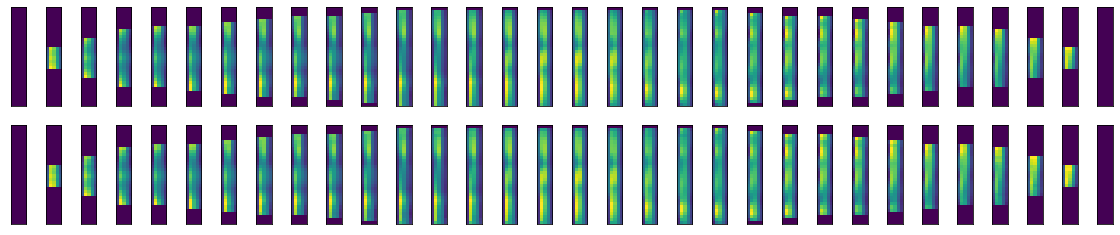

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=32, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([dataRTest[32:64].reshape(-1, 32, 5, 1), predicted3[32:64].reshape(-1, 32, 5, 1) ], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 5)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Individual Bands

In [ ]:
data.shape

(40, 489, 32, 32, 5)

In [ ]:
dataTR.shape

(19560, 5, 32, 32)

In [ ]:
print(dataTR.max())
print(dataTR.min())

922.4226132720968
-17.883913328897595


In [ ]:
dataTR[0]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

    

In [ ]:
delta_arr, theta_arr, alpha_arr, beta_arr, gamma_arr = [],[],[],[],[]
for i in range(dataTR.shape[0]):
    for j in range(5):
        if(j==0):
            delta_arr.append(dataTR[i][j])
        elif(j==1):
            theta_arr.append(dataTR[i][j])
        elif(j==2):
            alpha_arr.append(dataTR[i][j])
        elif(j==3):
            beta_arr.append(dataTR[i][j])
        elif(j==4):
            gamma_arr.append(dataTR[i][j])

In [ ]:
delta_arr[0].max()

54.390404703692106

In [ ]:
gamma_arr

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([

In [ ]:
dataTR.shape

(19560, 5, 32, 32)

In [ ]:
delta_arr_np = np.array(delta_arr)
theta_arr_np = np.array(theta_arr)
alpha_arr_np = np.array(alpha_arr)
beta_arr_np = np.array(beta_arr)
gamma_arr_np = np.array(gamma_arr)

In [ ]:
print(delta_arr_np.max())
print(delta_arr_np.min())
print(theta_arr_np.max())
print(theta_arr_np.min())
print(alpha_arr_np.max())
print(alpha_arr_np.min())
print(beta_arr_np.max())
print(beta_arr_np.min())
print(gamma_arr_np.max())
print(gamma_arr_np.min())

424.1107828196923
-17.883913328897595
922.4226132720968
0.0
670.6355346032815
0.0
342.81668849714447
0.0
405.37667528673745
0.0


In [ ]:
print(delta_arr_np.shape)
print(theta_arr_np.shape)
print(alpha_arr_np.shape)
print(beta_arr_np.shape)
print(gamma_arr_np.shape)

(19560, 32, 32)
(19560, 32, 32)
(19560, 32, 32)
(19560, 32, 32)
(19560, 32, 32)


Delta band

In [ ]:
delta_arr_np[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
delta_arr_np[0].shape

(32, 32)

In [ ]:
delta_arr_np.shape

(19560, 32, 32)

In [ ]:
delta_arr_np_train = delta_arr_np[:18000]
delta_arr_np_test = delta_arr_np[18000:]

In [ ]:
delta_arr_np_train.shape

(18000, 32, 32)

In [ ]:
delta_arr_np_test.shape

(1560, 32, 32)

In [ ]:
delta_arr_np.max()

424.1107828196923

In [ ]:
delta_arr_np_train.max()

424.1107828196923

In [ ]:
delta_arr_np_test.max()

199.2309909507739

In [ ]:
delta_arr_np_train = delta_arr_np_train / delta_arr_np.max()
delta_arr_np_test = delta_arr_np_test / delta_arr_np.max()

In [ ]:
import tensorflow as tf

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

input_img = tf.keras.Input(shape=(32, 32, 1))
l1 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',  activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)

l3 = tf.keras.layers.MaxPooling2D(padding='same')(l2)
l3 = tf.keras.layers.Dropout(0.3)(l3)
l4 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)

l6 = tf.keras.layers.MaxPooling2D(padding='same')(l5)
l7 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)

In [ ]:
l8 = tf.keras.layers.UpSampling3D()(l7)

l9 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)
l11 = tf.keras.layers.add([l5, l10])
l12 = tf.keras.layers.UpSampling3D()(l11)
l13 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)
l15 = tf.keras.layers.add([l14, l2])
decoded = tf.keras.layers.Conv2D(1, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

autoencoder_d = tf.keras.Model(input_img, decoded)
#autoencoder_hfenn = tf.keras.Model(input_img, decoded)

In [ ]:
autoencoder_d.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_35 (Conv2D)              (None, 32, 32, 64)   640         input_5[0][0]                    
__________________________________________________________________________________________________
conv2d_36 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_35[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_8 (MaxPooling2D)  (None, 16, 16, 64)   0           conv2d_36[0][0]                  
____________________________________________________________________________________________

In [ ]:
autoencoder_d.compile(loss=tf.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
autoencoder_d.fit(delta_arr_np_train.reshape(-1, 32, 32, 1),
                delta_arr_np_train.reshape(-1, 32, 32, 1),
                epochs = 30,
                batch_size = 200,
                validation_split = 0.1,
                callbacks = [callback])

Epoch 1/30
81/81 [==============================] - 17s 175ms/step - loss: 0.0021 - val_loss: 2.6731e-05
Epoch 2/30
81/81 [==============================] - 14s 171ms/step - loss: 1.6470e-05 - val_loss: 5.3657e-06
Epoch 3/30
81/81 [==============================] - 14s 172ms/step - loss: 4.3214e-06 - val_loss: 4.1973e-06
Epoch 4/30
81/81 [==============================] - 14s 170ms/step - loss: 3.0410e-06 - val_loss: 2.5025e-06
Epoch 5/30
81/81 [==============================] - 14s 169ms/step - loss: 2.5975e-06 - val_loss: 2.2192e-06
Epoch 6/30
81/81 [==============================] - 14s 169ms/step - loss: 2.0999e-06 - val_loss: 2.5826e-06
Epoch 7/30
81/81 [==============================] - 14s 170ms/step - loss: 1.9530e-06 - val_loss: 1.7952e-06
Epoch 8/30
81/81 [==============================] - 14s 170ms/step - loss: 1.8631e-06 - val_loss: 1.5917e-06
Epoch 9/30
81/81 [==============================] - 14s 170ms/step - loss: 1.6110e-06 - val_loss: 1.5600e-06
Epoch 10/30
81/81 [====

In [ ]:
evaluation = autoencoder_d.evaluate(delta_arr_np_test.reshape(-1, 32, 32, 1), delta_arr_np_test.reshape(-1, 32, 32, 1))

49/49 [==============================] - 1s 11ms/step - loss: 6.9476e-07


In [ ]:
predicted_d = autoencoder_d.predict(delta_arr_np_test.reshape(-1, 32, 32, 1))

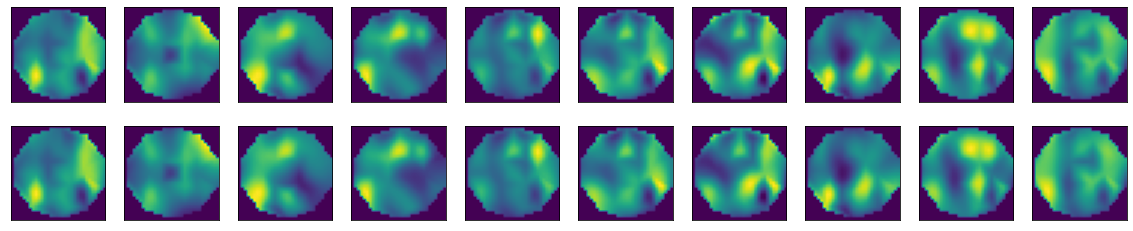

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([delta_arr_np_test[:10].reshape(-1, 32, 32, 1), predicted_d[:10]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Theta band

In [ ]:
theta_arr_np.shape

(19560, 32, 32)

In [ ]:
theta_arr_np.max()

922.4226132720968

In [ ]:
theta_arr_np = theta_arr_np / theta_arr_np.max()

In [ ]:
theta_arr_np.max()

1.0

In [ ]:
theta_arr_np_train = theta_arr_np[:18000]
theta_arr_np_test = theta_arr_np[18000:]

In [ ]:
theta_arr_np_train.shape

(18000, 32, 32)

In [ ]:
theta_arr_np_test.shape

(1560, 32, 32)

In [ ]:
autoencoder_d.fit(theta_arr_np_train.reshape(-1, 32, 32, 1),
                theta_arr_np_train.reshape(-1, 32, 32, 1),
                epochs = 30,
                batch_size = 200,
                validation_split = 0.1,
                callbacks = [callback])

Epoch 1/30
81/81 [==============================] - 14s 172ms/step - loss: 7.1790e-05 - val_loss: 2.5554e-06
Epoch 2/30
81/81 [==============================] - 14s 171ms/step - loss: 2.1930e-06 - val_loss: 1.9792e-06
Epoch 3/30
81/81 [==============================] - 14s 169ms/step - loss: 1.8653e-06 - val_loss: 1.7778e-06
Epoch 4/30
81/81 [==============================] - 14s 168ms/step - loss: 1.7124e-06 - val_loss: 1.6585e-06
Epoch 5/30
81/81 [==============================] - 14s 168ms/step - loss: 1.6157e-06 - val_loss: 1.5789e-06
Epoch 6/30
81/81 [==============================] - 14s 168ms/step - loss: 1.5480e-06 - val_loss: 1.5214e-06
Epoch 7/30
81/81 [==============================] - 14s 169ms/step - loss: 1.4972e-06 - val_loss: 1.4761e-06
Epoch 8/30
81/81 [==============================] - 14s 169ms/step - loss: 1.4563e-06 - val_loss: 1.4395e-06
Epoch 9/30
81/81 [==============================] - 14s 168ms/step - loss: 1.4219e-06 - val_loss: 1.4079e-06
Epoch 10/30
81/81 [

In [ ]:
evaluation = autoencoder_d.evaluate(theta_arr_np_test.reshape(-1, 32, 32, 1), theta_arr_np_test.reshape(-1, 32, 32, 1))

49/49 [==============================] - 0s 10ms/step - loss: 9.2717e-07


In [ ]:
predicted_t = autoencoder_d.predict(theta_arr_np_test.reshape(-1, 32, 32, 1))

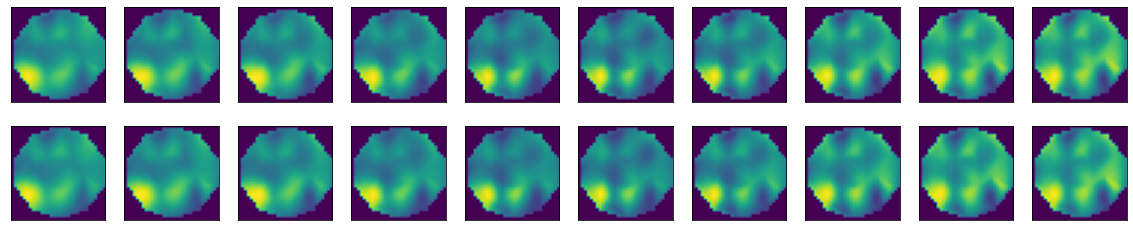

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([theta_arr_np_test[:10].reshape(-1, 32, 32, 1), predicted_t[:10]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Alpha band

In [ ]:
alpha_arr_np.shape

(19560, 32, 32)

In [ ]:
alpha_arr_np.max()

670.6355346032815

In [ ]:
alpha_arr_np = alpha_arr_np / alpha_arr_np.max()

In [ ]:
alpha_arr_np.max()

1.0

In [ ]:
alpha_arr_np_train = alpha_arr_np[:18000]
alpha_arr_np_test = alpha_arr_np[18000:]

In [ ]:
alpha_arr_np_train.shape

(18000, 32, 32)

In [ ]:
alpha_arr_np_test.shape

(1560, 32, 32)

In [ ]:
autoencoder_d.fit(alpha_arr_np_train.reshape(-1, 32, 32, 1),
                alpha_arr_np_train.reshape(-1, 32, 32, 1),
                epochs = 30,
                batch_size = 200,
                validation_split = 0.1,
                callbacks = [callback])

Epoch 1/30
81/81 [==============================] - 14s 168ms/step - loss: 9.1695e-05 - val_loss: 2.2718e-06
Epoch 2/30
81/81 [==============================] - 14s 169ms/step - loss: 1.9145e-06 - val_loss: 1.7530e-06
Epoch 3/30
81/81 [==============================] - 14s 168ms/step - loss: 1.7152e-06 - val_loss: 1.6370e-06
Epoch 4/30
81/81 [==============================] - 13s 167ms/step - loss: 1.6206e-06 - val_loss: 1.5670e-06
Epoch 5/30
81/81 [==============================] - 13s 166ms/step - loss: 1.5599e-06 - val_loss: 1.5183e-06
Epoch 6/30
81/81 [==============================] - 13s 167ms/step - loss: 1.5152e-06 - val_loss: 1.4800e-06
Epoch 7/30
81/81 [==============================] - 14s 167ms/step - loss: 1.4805e-06 - val_loss: 1.4503e-06
Epoch 8/30
81/81 [==============================] - 14s 167ms/step - loss: 1.4532e-06 - val_loss: 1.4259e-06
Epoch 9/30
81/81 [==============================] - 14s 167ms/step - loss: 1.4304e-06 - val_loss: 1.4057e-06
Epoch 10/30
81/81 [

In [ ]:
evaluation = autoencoder_d.evaluate(alpha_arr_np_test.reshape(-1, 32, 32, 1), alpha_arr_np_test.reshape(-1, 32, 32, 1))

49/49 [==============================] - 0s 10ms/step - loss: 1.1856e-06


In [ ]:
predicted_a = autoencoder_d.predict(alpha_arr_np_test.reshape(-1, 32, 32, 1))

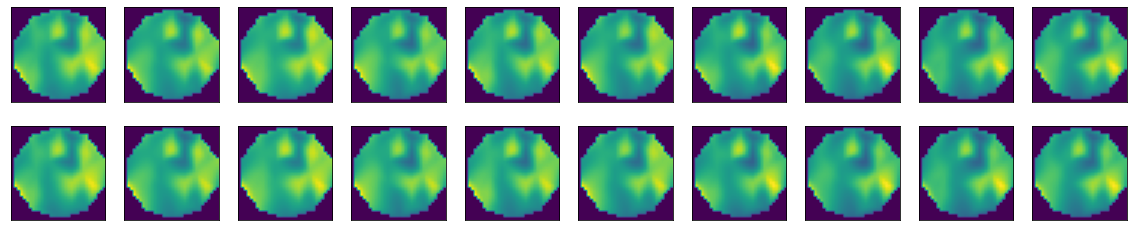

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([alpha_arr_np_test[:10].reshape(-1, 32, 32, 1), predicted_a[:10]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Beta Band

In [ ]:
beta_arr_np.shape

(19560, 32, 32)

In [ ]:
beta_arr_np.max()

342.81668849714447

In [ ]:
beta_arr_np = beta_arr_np / beta_arr_np.max()

In [ ]:
beta_arr_np.max()

1.0

In [ ]:
beta_arr_np_train = beta_arr_np[:18000]
beta_arr_np_test = beta_arr_np[18000:]

In [ ]:
beta_arr_np_train.shape

(18000, 32, 32)

In [ ]:
beta_arr_np_train.max()

1.0

In [ ]:
beta_arr_np_test.shape

(1560, 32, 32)

In [ ]:
autoencoder_d.fit(beta_arr_np_train.reshape(-1, 32, 32, 1),
                beta_arr_np_train.reshape(-1, 32, 32, 1),
                epochs = 30,
                batch_size = 200,
                validation_split = 0.1,
                callbacks = [callback])

Epoch 1/30
81/81 [==============================] - 14s 168ms/step - loss: 1.1179e-06 - val_loss: 1.0401e-06
Epoch 2/30
81/81 [==============================] - 14s 168ms/step - loss: 1.0520e-06 - val_loss: 1.0260e-06
Epoch 3/30
81/81 [==============================] - 14s 167ms/step - loss: 1.0397e-06 - val_loss: 1.0161e-06
Epoch 4/30
81/81 [==============================] - 13s 166ms/step - loss: 1.0294e-06 - val_loss: 1.0055e-06
Epoch 5/30
81/81 [==============================] - 13s 165ms/step - loss: 1.0908e-06 - val_loss: 1.3680e-06
Epoch 6/30
81/81 [==============================] - 13s 165ms/step - loss: 1.1919e-06 - val_loss: 1.1647e-06


In [ ]:
evaluation = autoencoder_d.evaluate(beta_arr_np_test.reshape(-1, 32, 32, 1), beta_arr_np_test.reshape(-1, 32, 32, 1))

49/49 [==============================] - 0s 9ms/step - loss: 1.1173e-06


In [ ]:
predicted_b = autoencoder_d.predict(beta_arr_np_test.reshape(-1, 32, 32, 1))

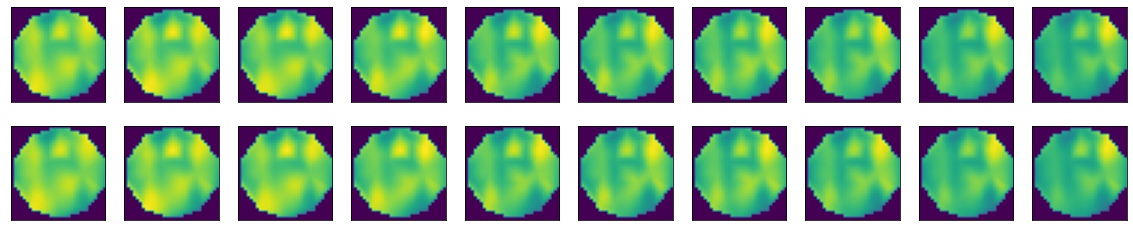

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([beta_arr_np_test[:10].reshape(-1, 32, 32, 1), predicted_b[:10]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Gamma Band

In [ ]:
gamma_arr_np.shape

(19560, 32, 32)

In [ ]:
gamma_arr_np.max()

405.37667528673745

In [ ]:
gamma_arr_np = gamma_arr_np / gamma_arr_np.max()

In [ ]:
gamma_arr_np.max()

1.0

In [ ]:
gamma_arr_np_train = gamma_arr_np[:18000]
gamma_arr_np_test = gamma_arr_np[18000:]

In [ ]:
gamma_arr_np_train.shape

(18000, 32, 32)

In [ ]:
gamma_arr_np_test.shape

(1560, 32, 32)

In [ ]:
gamma_arr_np_train.max()

1.0

In [ ]:
gamma_arr_np_test.max()

0.3169675368616122

In [ ]:
autoencoder_d.fit(gamma_arr_np_train.reshape(-1, 32, 32, 1),
                gamma_arr_np_train.reshape(-1, 32, 32, 1),
                epochs = 30,
                batch_size = 200,
                validation_split = 0.1,
                callbacks = [callback])

Epoch 1/30
81/81 [==============================] - 14s 168ms/step - loss: 3.3008e-06 - val_loss: 4.9892e-07
Epoch 2/30
81/81 [==============================] - 14s 168ms/step - loss: 5.2189e-07 - val_loss: 4.3162e-07
Epoch 3/30
81/81 [==============================] - 13s 167ms/step - loss: 4.7617e-07 - val_loss: 4.0960e-07
Epoch 4/30
81/81 [==============================] - 13s 166ms/step - loss: 4.5497e-07 - val_loss: 3.9760e-07
Epoch 5/30
81/81 [==============================] - 13s 166ms/step - loss: 4.4170e-07 - val_loss: 3.8914e-07
Epoch 6/30
81/81 [==============================] - 13s 166ms/step - loss: 4.3231e-07 - val_loss: 3.8251e-07
Epoch 7/30
81/81 [==============================] - 13s 167ms/step - loss: 4.2493e-07 - val_loss: 3.7721e-07
Epoch 8/30
81/81 [==============================] - 13s 167ms/step - loss: 4.1879e-07 - val_loss: 3.7239e-07
Epoch 9/30
81/81 [==============================] - 13s 167ms/step - loss: 4.1341e-07 - val_loss: 3.6858e-07
Epoch 10/30
81/81 [

In [ ]:
evaluation = autoencoder_d.evaluate(gamma_arr_np_test.reshape(-1, 32, 32, 1), gamma_arr_np_test.reshape(-1, 32, 32, 1))

49/49 [==============================] - 0s 10ms/step - loss: 3.6872e-07


In [ ]:
predicted_g = autoencoder_d.predict(gamma_arr_np_test.reshape(-1, 32, 32, 1))

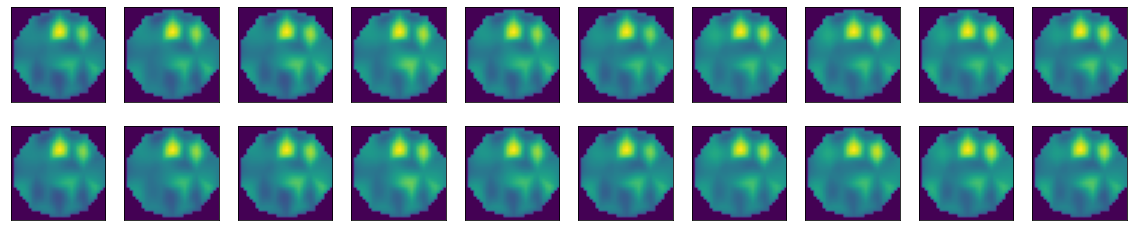

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([gamma_arr_np_test[:10].reshape(-1, 32, 32, 1), predicted_g[:10]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Three bands (Theta, Alpha, Beta)

In [ ]:
dataTR.shape

(19560, 5, 32, 32)

In [ ]:
print(dataTR.max())
print(dataTR.min())

922.4226132720968
-17.883913328897595


In [ ]:
print(dataTR.shape[0])
print(dataTR.shape[1])

19560
5


In [ ]:
threeBands = []

In [ ]:
for i in range(dataTR.shape[0]):
    for j in range(dataTR.shape[1]):
        if((j==1) or (j==2) or (j==3)):
            threeBands.append(dataTR[i][j])
        #if(j==2):
        #    threeBands.append(dataTR[i][j])
        #if(j==3):
        #    threeBands.append(dataTR[i][j])

In [ ]:
fivebands = []

In [ ]:
for i in range(dataTR.shape[0]):
    for j in range(dataTR.shape[1]):
        fivebands.append(dataTR[i][j])

In [ ]:
threeBands

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]), array([

In [ ]:
len(threeBands)

58680

In [ ]:
len(fivebands)

97800

In [ ]:
threeBands_arr_np = np.array(threeBands)

In [ ]:
fivebands_arr_np = np.array(fivebands)

In [ ]:
threeBands_arr_np

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
fivebands_arr_np

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
threeBands_arr_np.shape

(58680, 32, 32)

In [ ]:
fivebands_arr_np.shape

(97800, 32, 32)

In [ ]:
threeBands_arr_np[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
fivebands_arr_np[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
threeBands_arr_np.max()

922.4226132720968

In [ ]:
fivebands_arr_np.max()

922.4226132720968

In [ ]:
threeBands_arr_np.min()

0.0

In [ ]:
fivebands_arr_np.min()

-17.883913328897595

In [ ]:
threeBands_arr_np = threeBands_arr_np / threeBands_arr_np.max()

In [ ]:
fivebands_arr_np = fivebands_arr_np / fivebands_arr_np.max()

In [ ]:
print(threeBands_arr_np.max())
print(threeBands_arr_np.min())

1.0
0.0


In [ ]:
print(fivebands_arr_np.max())
print(fivebands_arr_np.min())

1.0
-0.019387982332152765


In [ ]:
threeBands_arr_np_train = threeBands_arr_np[:50000]
threeBands_arr_np_test = threeBands_arr_np[50000:]

In [ ]:
threeBands_arr_np_train.shape

(50000, 32, 32)

In [ ]:
threeBands_arr_np_train.max()

1.0

In [ ]:
threeBands_arr_np_test.shape

(8680, 32, 32)

In [ ]:
threeBands_arr_np_test.max()

0.6211107047833053

In [ ]:
import tensorflow as tf

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

input_img = tf.keras.Input(shape=(32, 32, 1))
l1 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu',  activity_regularizer=tf.keras.regularizers.l1(10e-10))(input_img)
l2 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l1)

l3 = tf.keras.layers.MaxPooling2D(padding='same')(l2)
#l3 = tf.keras.layers.Dropout(0.3)(l3)
l4 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l3)
l5 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l4)

l6 = tf.keras.layers.MaxPooling2D(padding='same')(l5)
l7 = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l6)

l8 = tf.keras.layers.UpSampling3D()(l7)

l9 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l8)
l10 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l9)
l11 = tf.keras.layers.add([l5, l10])
l12 = tf.keras.layers.UpSampling3D()(l11)
l13 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l12)
l14 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l13)
l15 = tf.keras.layers.add([l14, l2])
decoded = tf.keras.layers.Conv2D(1, (3,3), padding='same', activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-10))(l15)

autoencoder_threeBand = tf.keras.Model(input_img, decoded)

In [ ]:
autoencoder_threeBand.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 64)   640         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 32, 32, 64)   36928       conv2d_15[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 16, 16, 64)   0           conv2d_16[0][0]                  
____________________________________________________________________________________________

In [ ]:
autoencoder_threeBand.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam(lr=0.001))

In [ ]:
history = autoencoder_threeBand.fit(threeBands_arr_np_train.reshape(-1, 32, 32, 1),
                threeBands_arr_np_train.reshape(-1, 32, 32, 1),
                epochs = 30,
                batch_size = 500,
                validation_split = 0.1,
                callbacks = [callback],
                shuffle = False)

Epoch 1/30
90/90 [==============================] - 24s 218ms/step - loss: 0.0022 - val_loss: 1.2510e-05
Epoch 2/30
90/90 [==============================] - 19s 212ms/step - loss: 6.9349e-06 - val_loss: 3.2958e-06
Epoch 3/30
90/90 [==============================] - 19s 212ms/step - loss: 4.3105e-06 - val_loss: 2.6577e-06
Epoch 4/30
90/90 [==============================] - 19s 211ms/step - loss: 2.5478e-06 - val_loss: 2.2892e-06
Epoch 5/30
90/90 [==============================] - 19s 212ms/step - loss: 2.3543e-06 - val_loss: 2.1214e-06
Epoch 6/30
90/90 [==============================] - 19s 212ms/step - loss: 2.1255e-06 - val_loss: 1.9962e-06
Epoch 7/30
90/90 [==============================] - 19s 212ms/step - loss: 1.9998e-06 - val_loss: 1.9079e-06
Epoch 8/30
90/90 [==============================] - 19s 212ms/step - loss: 3.0778e-06 - val_loss: 1.9667e-06
Epoch 9/30
90/90 [==============================] - 19s 212ms/step - loss: 1.8268e-06 - val_loss: 1.7066e-06
Epoch 10/30
90/90 [====

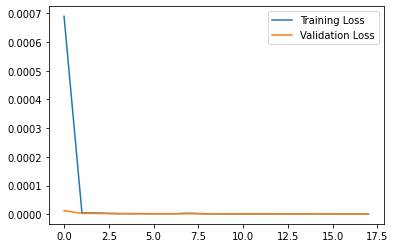

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [ ]:
evaluation = autoencoder_threeBand.evaluate(threeBands_arr_np_test.reshape(-1, 32, 32, 1), threeBands_arr_np_test.reshape(-1, 32, 32, 1))

272/272 [==============================] - 3s 8ms/step - loss: 1.3818e-06


In [ ]:
predicted_threeBand = autoencoder_threeBand.predict(threeBands_arr_np_test.reshape(-1, 32, 32, 1))

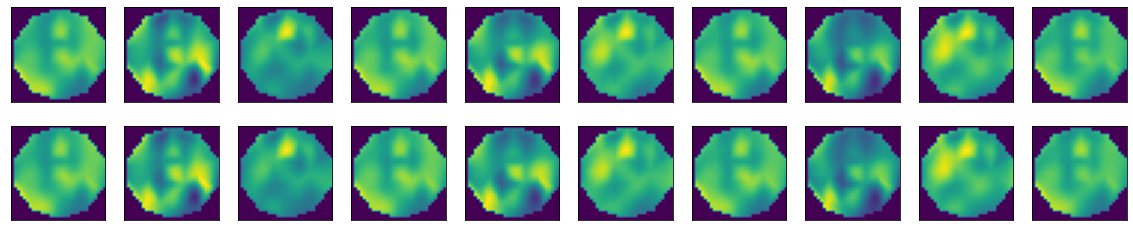

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([threeBands_arr_np_test[:10].reshape(-1, 32, 32, 1), predicted_threeBand[:10]], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((32, 32)))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

Scipy signal processing kit

In [ ]:
from scipy import signal 

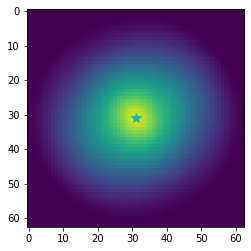

In [ ]:
cor = signal.correlate2d(threeBands_arr_np_test[0], predicted_threeBand[0].reshape(32,32))
plt.imshow(cor)

coordin = np.where(cor == np.max(cor))
listOfCoordinates = list(zip(coordin[1], coordin[0]))

for i in range(len(listOfCoordinates)):
    plt.plot(listOfCoordinates[i][0], listOfCoordinates[i][1], 'c*', markersize=10)

In [ ]:
predicted_threeBand.shape

(8680, 32, 32, 1)

In [ ]:
predicted_threeBandUp = predicted_threeBand.reshape(8680,32,32) 

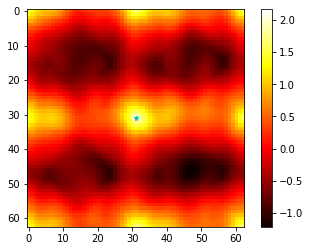

In [ ]:
corr = signal.correlate2d(threeBands_arr_np_test[0] - threeBands_arr_np_test[0].mean(), 
                          predicted_threeBandUp[10] - predicted_threeBandUp[10].mean(),
                          boundary = 'symm', mode='full')
max_coords = np.where(corr==np.max(corr))
plt.plot(max_coords[1], max_coords[0], 'c*', markersize=5)
plt.imshow(corr, cmap='hot')
plt.colorbar()

In [ ]:
print(cor)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
predicted_threeBand[0].shape

(32, 32, 1)

In [ ]:
threeBands_arr_np_test[0].shape

(32, 32)

In [ ]:
predicted_threeBand[0].reshape(32,32)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 5.6496961e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.1163328e-04],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 7.4299518e-05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 6.5694191e-04]], dtype=float32)

In [ ]:
predicted_threeBand[0].max()

0.110578716

In [ ]:
threeBands_arr_np_test[0].max()

0.11080959381257063

In [ ]:
threeBands_arr_np_test[0].shape

(32, 32)

In [ ]:
predicted_threeBandUp[0].shape

(32, 32)

In [ ]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype('float') - imageB.astype('float')) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

In [ ]:
predicted_threeBandUpNoise[0] = predicted_threeBandUp[0]

NameError: ignored

In [ ]:
recErr = mse(threeBands_arr_np_test[0], predicted_threeBandUp[0])

In [ ]:
recErr

4.1778064811303767e-08

In [ ]:
# add some noise
noise_factor = 0.3
noise_threeBands_arr_np_test = []

for img in threeBands_arr_np_test:
  noisy_img = img + noise_factor * np.random.randn(*img.shape)
  noisy_img = np.clip(noisy_img, 0, 1)
  noise_threeBands_arr_np_test.append(noisy_img)

In [ ]:
recErr1 = mse(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[0])
recErr1

0.04701975159156866

In [ ]:
from skimage import metrics

In [ ]:
ssimErrPair = metrics.structural_similarity(threeBands_arr_np_test[0], predicted_threeBandUp[0].astype('float64')) 
ssimErrNoPair = metrics.structural_similarity(threeBands_arr_np_test[0], predicted_threeBandUp[100].astype('float64'))
ssimErrPairNoise = metrics.structural_similarity(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[0])
ssimErrNoPairNoise = metrics.structural_similarity(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[100])

In [ ]:
print('SSIM Input[0] and Recon[0]: ', ssimErrPair)
print('SSIM Input[0] and Recon[100]: ', ssimErrNoPair)
print('SSIM INput[0] and Recon[0]+Noise: ', ssimErrPairNoise)
print('SSIM Input[0] and Recon[100]+Noise: ', ssimErrNoPairNoise)

SSIM Input[0] and Recon[0]:  0.9999901097825983
SSIM Input[0] and Recon[100]:  0.9566278014940794
SSIM INput[0] and Recon[0]+Noise:  0.06787994058618627
SSIM Input[0] and Recon[100]+Noise:  0.06626610537730984


In [ ]:
predicted_threeBandUp.dtype

dtype('float32')

In [ ]:
predicted_threeBand.dtype

dtype('float32')

(-0.5, 31.5, 31.5, -0.5)

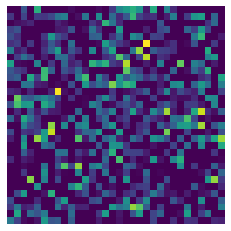

In [ ]:
plt.imshow(noise_threeBands_arr_np_test[0])
plt.axis(False)

(-0.5, 31.5, 31.5, -0.5)

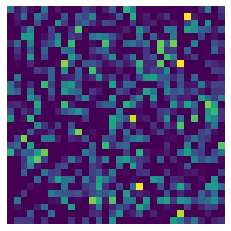

In [ ]:
plt.imshow(noise_threeBands_arr_np_test[100])
plt.axis(False)

(-0.5, 31.5, 31.5, -0.5)

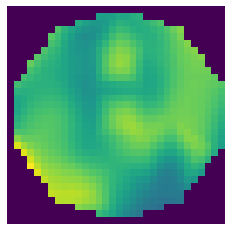

In [ ]:
plt.imshow(predicted_threeBandUp[0])
plt.axis(False)

(-0.5, 31.5, 31.5, -0.5)

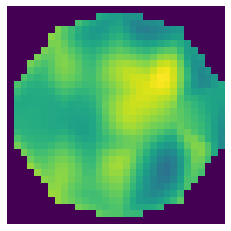

In [ ]:
plt.imshow(predicted_threeBandUp[100])
plt.axis(False)

(-0.5, 31.5, 31.5, -0.5)

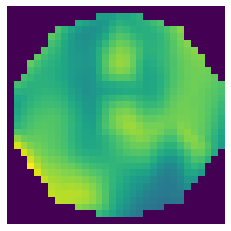

In [ ]:
plt.imshow(threeBands_arr_np_test[0])
plt.axis(False)

In [ ]:
mseErrPair = metrics.mean_squared_error(threeBands_arr_np_test[0], predicted_threeBandUp[0].astype('float64')) 
mseErrNoPair = metrics.mean_squared_error(threeBands_arr_np_test[0], predicted_threeBandUp[100].astype('float64'))
mseErrPairNoise = metrics.mean_squared_error(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[0])
mseErrNoPairNoise = metrics.mean_squared_error(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[100])

In [ ]:
print('MSE Input[0] and Recon[0]: ', mseErrPair)
print('MSE Input[0] and Recon[100]: ', mseErrNoPair)
print('MSE INput[0] and Recon[0]+Noise: ', mseErrPairNoise)
print('MSE Input[0] and Recon[100]+Noise: ', mseErrNoPairNoise)

MSE Input[0] and Recon[0]:  5.729268581210536e-08
MSE Input[0] and Recon[100]:  0.0002327594450087631
MSE INput[0] and Recon[0]+Noise:  0.04971460724240854
MSE Input[0] and Recon[100]+Noise:  0.04944364327685466


In [ ]:
nrmseErrPair = metrics.normalized_root_mse(threeBands_arr_np_test[0], predicted_threeBandUp[0].astype('float64'))
nrmseErrNoPair = metrics.normalized_root_mse(threeBands_arr_np_test[0], predicted_threeBandUp[100].astype('float64'))
nrmseErrPairNoise = metrics.normalized_root_mse(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[0])
nrmseErrNoPairNoise = metrics.normalized_root_mse(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[100])

In [ ]:
print('NRMSE Input[0] and Recon[0]: ', nrmseErrPair)
print('NRMSE Input[0] and Recon[100]: ', nrmseErrNoPair)
print('NRMSE INput[0] and Recon[0]+Noise: ', nrmseErrPairNoise)
print('NRMSE Input[0] and Recon[100]+Noise: ', nrmseErrNoPairNoise)

NRMSE Input[0] and Recon[0]:  0.0037391267046805476
NRMSE Input[0] and Recon[100]:  0.23832754946884255
NRMSE INput[0] and Recon[0]+Noise:  3.483073165732594
NRMSE Input[0] and Recon[100]+Noise:  3.4735681440860637


In [ ]:
threeBands_arr_np_test.shape

(8680, 32, 32)

In [ ]:
predicted_threeBandUp.shape

(8680, 32, 32)

In [ ]:
mseErrAllPair = 0
for i in range(threeBands_arr_np_test.shape[0]):
    mseErrAllPair += metrics.mean_squared_error(threeBands_arr_np_test[i], predicted_threeBandUp[i].astype('float64')) / threeBands_arr_np_test.shape[0]

mseErrAllPair

2.391830271357342e-07

In [ ]:
nrmseErrAllPair = 0
for i in range(threeBands_arr_np_test.shape[0]):
    nrmseErrAllPair += metrics.normalized_root_mse(threeBands_arr_np_test[i], predicted_threeBandUp[i].astype('float64')) / threeBands_arr_np_test.shape[0]

nrmseErrAllPair

0.004333817940347947

In [ ]:
ssimErrAllPair = 0
for i in range(threeBands_arr_np_test.shape[0]):
    ssimErrAllPair += metrics.structural_similarity(threeBands_arr_np_test[i], predicted_threeBandUp[i].astype('float64')) / threeBands_arr_np_test.shape[0]

In [ ]:
ssimErrAllPair

0.9999823825301911

Cross correlation

(-0.5, 62.5, 62.5, -0.5)

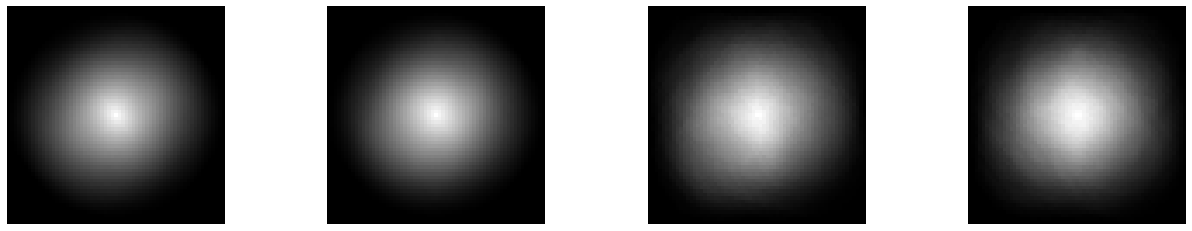

In [ ]:
corPair = signal.correlate2d(threeBands_arr_np_test[0], predicted_threeBandUp[0])
corNoPair = signal.correlate2d(threeBands_arr_np_test[0], predicted_threeBandUp[100])
corPairNoise = signal.correlate2d(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[0])
corNoPairNoise =signal.correlate2d(threeBands_arr_np_test[0], noise_threeBands_arr_np_test[100])


#plt.imshow(corNoPair)

'''
coordin = np.where(cor == np.max(cor))
listOfCoordinates = list(zip(coordin[1], coordin[0]))

for i in range(len(listOfCoordinates)):
    plt.plot(listOfCoordinates[i][0], listOfCoordinates[i][1], 'c.', markersize=5)
'''



#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(22,4))

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(corPair, cmap='gray')
axarr[0].axis('off')
axarr[1].imshow(corNoPair, cmap='gray')
axarr[1].axis('off')
axarr[2].imshow(corPairNoise, cmap='gray')
axarr[2].axis('off')
axarr[3].imshow(corNoPairNoise, cmap='gray')
axarr[3].axis('off')